# **Analyze Sample Store Data in United States**

# Import necessary libraries and datasets, then preview the dataframe

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
# Import and preview data first 5 rows
store = pd.read_csv('/content/drive/MyDrive/SimpleStore/SampleStore.csv')
store.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2019-152156,08/11/2019,11/11/2019,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0%,41.9136
1,2,CA-2019-152156,08/11/2019,11/11/2019,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0%,219.5820
2,3,CA-2019-138688,12/06/2019,16/06/2019,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0%,6.8714
3,4,US-2018-108966,11/10/2018,18/10/2018,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,45%,-383.0310
4,5,US-2018-108966,11/10/2018,18/10/2018,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,20%,2.5164


In [17]:
# Shape of Dataframe
store.shape

(9994, 21)

In [18]:
# Converts Order Date to datetime format
store['Order Date'] = pd.to_datetime(store['Order Date'], format='%d/%m/%Y')


In [19]:
# Recheck Information of dataframe
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          9994 non-null   int64         
 1   Order ID        9994 non-null   object        
 2   Order Date      9994 non-null   datetime64[ns]
 3   Ship Date       9994 non-null   object        
 4   Ship Mode       9994 non-null   object        
 5   Customer ID     9994 non-null   object        
 6   Customer Name   9994 non-null   object        
 7   Segment         9994 non-null   object        
 8   Country/Region  9994 non-null   object        
 9   City            9994 non-null   object        
 10  State           9994 non-null   object        
 11  Postal Code     9983 non-null   float64       
 12  Region          9994 non-null   object        
 13  Product ID      9994 non-null   object        
 14  Category        9994 non-null   object        
 15  Sub-

In [20]:
store.isna().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country/Region,0
City,0


In [21]:
# Filter rows with missing values
store_missing = store[store.isna().any(axis=1)]
store_missing


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2234,2235,CA-2020-104066,2020-12-05,12/10/2020,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,...,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03,7,0%,67.6599
5274,5275,CA-2018-162887,2018-11-07,11/09/2018,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,...,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20,3,0%,178.8000
8798,8799,US-2019-150140,2019-04-06,04/10/2019,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,...,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75,5,0%,336.6350
9146,9147,US-2019-165505,2019-01-23,27/01/2019,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,...,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98,2,0%,42.9914
9147,9148,US-2019-165505,2019-01-23,27/01/2019,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,...,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04,6,0%,2.7336
9148,9149,US-2019-165505,2019-01-23,27/01/2019,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,...,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29,13,0%,406.7154
9386,9387,US-2020-127292,2020-01-19,23/01/2020,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,...,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92,4,0%,37.5624
9387,9388,US-2020-127292,2020-01-19,23/01/2020,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,...,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28,1,0%,5.7716
9388,9389,US-2020-127292,2020-01-19,23/01/2020,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,...,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94,3,0%,152.0232
9389,9390,US-2020-127292,2020-01-19,23/01/2020,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,...,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04,1,0%,0.9588


#Generate the statistical summary of the dataframe

In [22]:
#Sumarise of Sales
store['Sales'].describe()

,Sales
count,9994.000000
mean,229.858001
std,623.245101
min,0.444000
25%,17.280000
50%,54.490000
75%,209.940000
max,22638.480000


###Overall Observations

1. High Variability: The large standard deviation suggests that the sales data is highly variable, with a wide range of values. This could indicate factors such as product diversity, seasonal fluctuations, or differences in customer spending habits.

2. Potential Outliers: The maximum value (22638.48) is significantly higher than the other values, suggesting the presence of potential outliers or anomalies in the data. These outliers could be due to one-time large orders, errors in data entry, or other exceptional circumstances.

3. Skewness: The significant difference between the mean and the median, as well as the large gap between the 75th percentile and the maximum, indicates that the distribution of sales data is likely right-skewed. This means that there are more smaller sales and fewer very large sales.

###Find the Highest Profiting Segment in 2019

In [23]:
# Filter data for 2019
store_2019 = store[store['Order Date'].dt.year == 2019]

# Calculate profit for each segment
segment_profit = store_2019.groupby('Segment')['Profit'].sum()
print(f"{segment_profit}\n")

# Find the segment with the highest profit
highest_profit_segment = segment_profit.idxmax()
print(f"The segment with the highest profit in 2019 is: {highest_profit_segment}")


Segment
Consumer       35770.9532
Corporate      30995.1690
Home Office    15029.0521
Name: Profit, dtype: float64

The segment with the highest profit in 2019 is: Consumer


###Find the top 5 states with the least sales

In [24]:
# Filter data for the specified date range
start_date = '2019-01-01'
end_date = '2019-12-31'
mask = (store['Order Date'] >= start_date) & (store['Order Date'] <= end_date)
filtered_store = store[mask]
# Calculate total sales for each state
state_sales = filtered_store.groupby('State')['Sales'].sum()

# Find the top 5 states with the least sales
top_5_least_sales_states = state_sales.nsmallest(5)
print(top_5_least_sales_states)


State
New Mexico               64.08
District of Columbia    117.07
Louisiana               262.76
South Carolina          502.48
Maine                   547.33
Name: Sales, dtype: float64


###Proportion of Total Sales in West and Central Regions for 2019

In [25]:
# Filter data for 2019 and West + Central regions
store_2019_west_central = store_2019[(store_2019['Region'] == 'West') | (store_2019['Region'] == 'Central')]

# Calculate total sales for West + Central in 2019
total_sales_west_central_2019 = store_2019_west_central['Sales'].sum()

# Calculate total sales for all regions in 2019
total_sales_2019 = store_2019['Sales'].sum()

# Calculate the proportion of total sales in West + Central in 2019
proportion = (total_sales_west_central_2019 / total_sales_2019) * 100

print(f"The proportion of total sales in West + Central in 2019 is: {proportion:.2f}%")


The proportion of total sales in West + Central in 2019 is: 54.97%


###Top 10 popular Sub-Category in terms of number of sales


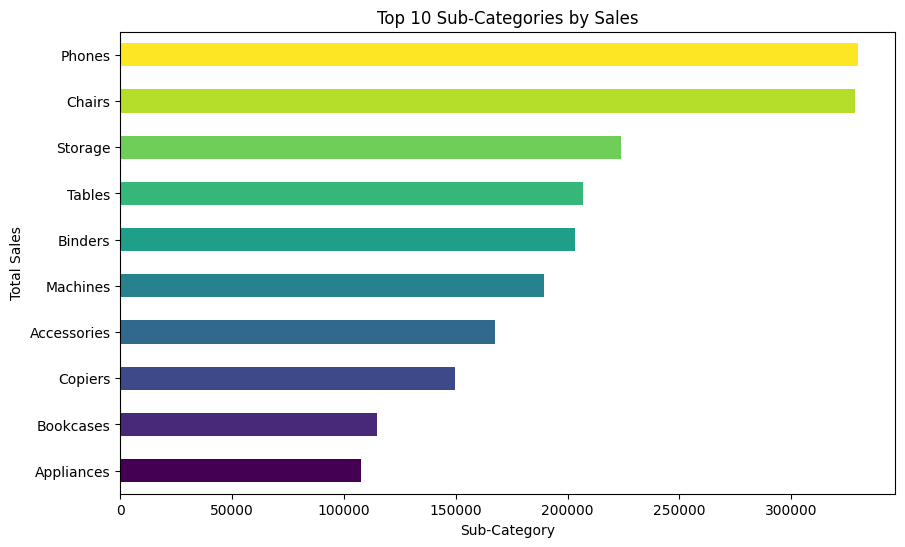

,Sales
Sub-Category,
Phones,330007.0540
Chairs,328449.1030
Storage,223843.6080
Tables,206965.5320
Binders,203412.7330
Machines,189238.6310
Accessories,167380.3180
Copiers,149528.0300
Bookcases,114879.9963


In [26]:
category_sales = store.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).head(10)
cmap = plt.cm.viridis
colors = cmap(np.linspace(0, 1, len(category_sales)))
category_sales.sort_values().plot(kind='barh', figsize=(10, 6),color=colors)
plt.title('Top 10 Sub-Categories by Sales')
plt.xlabel('Sub-Category')
plt.ylabel('Total Sales')
plt.show()
category_sales


###Top 10 popular products in terms of number of orders and sales


In [27]:
# Filter data for 2019-2020
store_2019_2020 = store[(store['Order Date'].dt.year >= 2019) & (store['Order Date'].dt.year <= 2020)]

# Group by product name and count orders
product_orders = store_2019_2020.groupby('Product Name')['Order ID'].count().sort_values(ascending=False).head(10)

# Group by product name and sum sales
product_sales = store_2019_2020.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)

print("Top 10 popular products in terms of number of orders:\n", product_orders)
print("\nTop 10 popular products in terms of total sales:\n", product_sales)


Top 10 popular products in terms of number of orders:
 Product Name
Easy-staple paper                                  27
Staples                                            24
Staple envelope                                    22
Staples in misc. colors                            13
Staple remover                                     12
Storex Dura Pro Binders                            12
Chromcraft Round Conference Tables                 12
Global Wood Trimmed Manager's Task Chair, Khaki    11
Avery Non-Stick Binders                            11
Staple-based wall hangings                         10
Name: Order ID, dtype: int64

Top 10 popular products in terms of total sales:
 Product Name
Canon imageCLASS 2200 Advanced Copier                 61599.824
Hewlett Packard LaserJet 3310 Copier                  16079.732
3D Systems Cube Printer, 2nd Generation, Magenta      14299.890
GBC Ibimaster 500 Manual ProClick Binding System      13621.542
GBC DocuBind TL300 Electric Binding System 

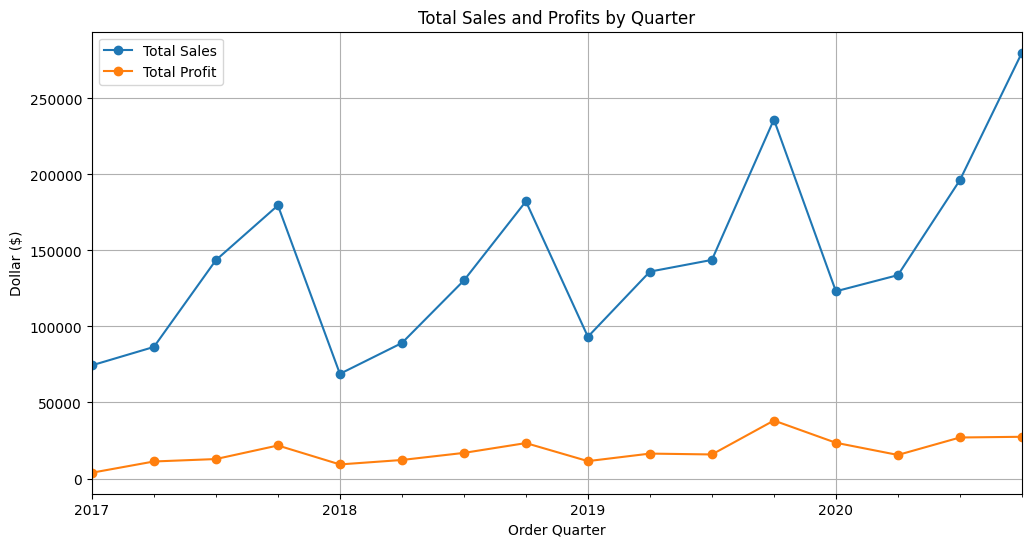

In [28]:
# Create 'Order Quarter' column
store['Order Quarter'] = store['Order Date'].dt.to_period('Q')

# Group data by order quarter and sum sales
quarterly_sales = store.groupby('Order Quarter')['Sales'].sum()
quarterly_profit = store.groupby('Order Quarter')['Profit'].sum()

# Plot time series graph
plt.figure(figsize=(12, 6))
quarterly_sales.plot(kind='line', marker='o',label = 'Total Sales')
quarterly_profit.plot(kind='line', marker='o',label = 'Total Profit')
plt.title('Total Sales and Profits by Quarter')
plt.xlabel('Order Quarter')
plt.ylabel('Dollar ($)')
plt.grid(True)
plt.legend()
plt.show()


#Summary



Analysis of sales data revealed a distinct seasonal pattern. Total company sales exhibited a consistent upward trend from the first to the fourth quarter of each year, followed by a significant decline at the year-end.

### Key factors influencing this pattern include:

* Seasonality:
Fluctuations in consumer demand tied to seasonal events and weather patterns have a substantial impact on sales.
* Economic Conditions: Overall economic conditions, such as periods of expansion or contraction, affect consumer purchasing power.

### Recommendations:
* In-depth Analysis: Conduct a detailed analysis of factors influencing sales in each season to better understand consumer behavior.
* Production and Inventory Planning: Enhance production processes and inventory management for greater flexibility in responding to fluctuating demand.
* Marketing Strategy Development: Develop diverse marketing strategies that cater to consumer needs throughout the year.
* Product Diversification: Expand product lines to spread risk and reduce the impact of fluctuations in specific product segments.

### Conclusion:
Understanding seasonal sales patterns empowers companies to make more informed business decisions and adapt swiftly to changing market conditions.



